In [1]:
import pandas as pd

In [2]:
ratings=pd.read_csv('/content/drive/MyDrive/추천 시스템/data/ml-latest-small/ratings.csv')

In [3]:
ratings.tail(10)

,userId,movieId,rating,tstamp
3908647,5974,74458,4.0,2020-07-10 13:14:22
3908648,411,101088,3.5,2014-03-07 14:17:24
3908649,3350,364,4.5,2019-01-02 09:52:25
3908650,5303,97792,3.0,2021-05-18 04:49:07
3908651,2877,4326,5.0,2019-08-31 06:30:32
3908652,2099,77328,4.5,2017-02-18 23:29:18
3908653,2024,148652,3.5,2019-03-24 00:29:28
3908654,3751,60684,1.0,2019-04-06 22:25:38
3908655,17,2694,3.0,2007-11-09 16:11:26
3908656,1684,3948,3.5,2017-02-03 18:19:11


In [4]:
ratings.shape

(3908657, 4)

In [5]:
len(ratings['userId'].unique()) # 6724명의 유저 데이터
len(ratings['movieId'].unique()) # 68044의 영화 데이터

68044

In [6]:
ratings['rating'].describe()

count    3.908657e+06
mean     3.419320e+00
std      1.022044e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<Axes: >

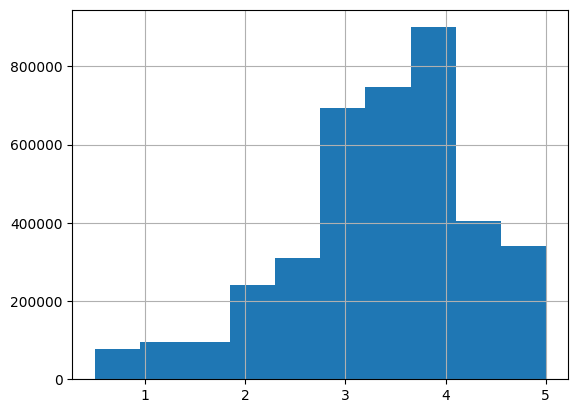

In [7]:
%matplotlib inline
ratings['rating'].hist()

### 사람들은 평균적으로 몇 개의 영화에 대해서 rating을 남겼는가?

In [8]:
ratings

,userId,movieId,rating,tstamp
0,206,4803,4.0,2003-04-07 13:52:01
1,5073,72731,4.0,2020-02-19 16:07:53
2,4739,91653,4.0,2020-12-28 15:35:58
3,535,3005,3.0,2008-12-26 05:38:11
4,465,4776,3.0,2008-08-13 20:22:36
...,...,...,...,...
3908652,2099,77328,4.5,2017-02-18 23:29:18
3908653,2024,148652,3.5,2019-03-24 00:29:28
3908654,3751,60684,1.0,2019-04-06 22:25:38
3908655,17,2694,3.0,2007-11-09 16:11:26


In [12]:
users=ratings.groupby('userId')['movieId'].count()
users

userId
1       1041
2        353
3        300
4        505
5       3171
        ... 
6720     107
6721     112
6722      59
6723     164
6724     216
Name: movieId, Length: 6724, dtype: int64

In [ ]:
users.describe()

count    6724.000000
mean      581.299375
std       703.808243
min         1.000000
25%       166.000000
50%       347.500000
75%       729.000000
max      9601.000000
Name: movieId, dtype: float64

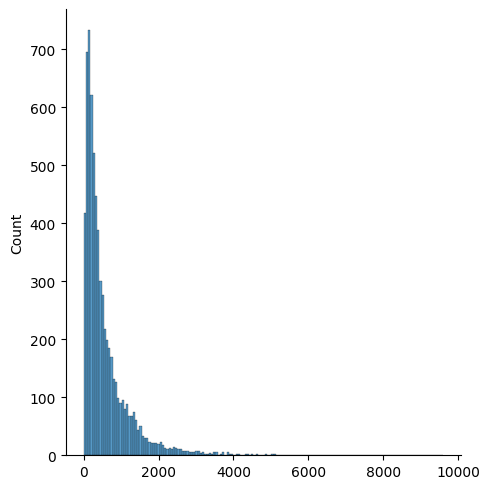

In [ ]:
import seaborn as sns
sns.displot(users.values) #power law distribution, 멱함수 분포
#유저당 평균 500개의 영화를 봄

# 사람들이 많이 보는 영화는?

In [15]:
films=ratings.groupby('movieId')['userId'].count()
films

movieId
1         3482
2         2043
3          281
4           70
5          386
          ... 
270580       1
270582       1
270588       1
270590       1
270592       1
Name: userId, Length: 68044, dtype: int64

In [14]:
films.describe() # 평균 57번의 rating이 매겨졌다.

count    68044.000000
mean        57.443081
std        253.835737
min          1.000000
25%          1.000000
50%          4.000000
75%         15.000000
max       5506.000000
Name: userId, dtype: float64

<ipython-input-31-7bb89893366d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(films.values)


<Axes: ylabel='Density'>

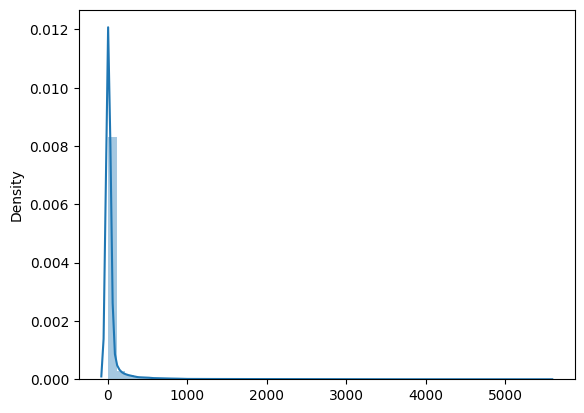

In [ ]:
sns.distplot(films.values)

In [ ]:
films.sort_values(ascending=False)[:5]

movieId
79132    5506
2571     5347
2959     5101
58559    4975
318      4945
Name: userId, dtype: int64

In [ ]:
movies=pd.read_csv('/content/drive/MyDrive/추천 시스템/data/ml-latest-small/movies.csv',index_col='movieId')

In [ ]:
movies.loc[[79132,2571,2959,58559,318]]

,title,genres
movieId,,
79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2959,Fight Club (1999),Action|Crime|Drama|Thriller
58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
318,"Shawshank Redemption, The (1994)",Crime|Drama


### 겨울왕국 평점보기

In [ ]:
frozen=ratings[ratings['movieId']==106696]

In [ ]:
len(frozen)

2148

<Axes: >

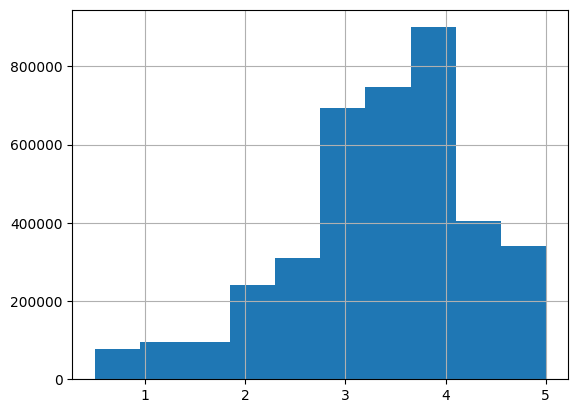

In [ ]:
ratings['rating'].hist()

<Axes: >

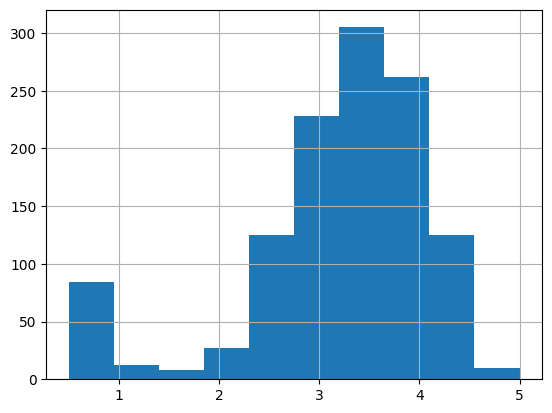

In [ ]:
ratings.loc[ratings['userId']==1647,'rating'].hist()

In [16]:
import pandas as pd

In [17]:
from datetime import datetime

In [22]:
ratings

,userId,movieId,rating,tstamp
0,206,4803,4.0,2003-04-07 13:52:01
1,5073,72731,4.0,2020-02-19 16:07:53
2,4739,91653,4.0,2020-12-28 15:35:58
3,535,3005,3.0,2008-12-26 05:38:11
4,465,4776,3.0,2008-08-13 20:22:36
...,...,...,...,...
3908652,2099,77328,4.5,2017-02-18 23:29:18
3908653,2024,148652,3.5,2019-03-24 00:29:28
3908654,3751,60684,1.0,2019-04-06 22:25:38
3908655,17,2694,3.0,2007-11-09 16:11:26


### 내 데이터 붙이기

In [23]:
myratings=pd.read_csv('/content/drive/MyDrive/추천 시스템/data/ml-latest-small/my-ratings.csv')

In [25]:
myratings['tstamp']=pd.to_datetime(myratings['tstamp'])

In [27]:
ratings_concat=pd.concat([ratings,myratings])

In [29]:
ratings_concat.tail(20)

,userId,movieId,rating,tstamp
3908641,4035,60069,3.5,2019-06-25 16:48:48
3908642,492,4848,4.5,2009-02-26 19:56:56
3908643,6598,129354,4.0,2020-11-11 12:31:08
3908644,272,6618,3.0,2007-06-02 00:29:08
3908645,5445,103249,3.0,2020-04-17 18:18:48
3908646,250,53000,4.0,2009-10-30 19:20:23
3908647,5974,74458,4.0,2020-07-10 13:14:22
3908648,411,101088,3.5,2014-03-07 14:17:24
3908649,3350,364,4.5,2019-01-02 09:52:25
3908650,5303,97792,3.0,2021-05-18 04:49:07


In [30]:
ratings_concat.to_pickle('/content/drive/MyDrive/추천 시스템/data/ml-latest-small/ratings_updated.p')